<a href="https://colab.research.google.com/github/dajuctech/Deep_Learning_Course/blob/main/Week%201%20DL%201/IrisDnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feed Forward DNN for the Iris Dataset

Load the Iris Dataset

In [28]:
import pandas as pd   # import the pandas library for data exploration
from sklearn.datasets import load_iris    # load the iris dataset from the Sci kit learn library

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Data Setup

In [5]:
# Normalise the data
from sklearn.preprocessing import normalize
df_norm = normalize(df)
df_norm[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

Normalization is done to ensure all features have equal influence on the model's learning process by scaling them to a similar range, usually between 0 and 1. This helps avoid features with larger values dominating and potentially leading to slower training and suboptimal results.

In [3]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)  # random_state controls the shuffling applied to the data before the split

In [8]:
# one hot encode the training data
from tensorflow.keras import utils
y_train_cat = utils.to_categorical(y_train)
y_train_cat[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

One-hot encoding transforms the target variable (species of Iris in this case) into a format that's easier for the neural network to understand. It converts categorical labels (like 'setosa', 'versicolor', 'virginica') into numerical representations where each category is represented by a binary vector with a single '1' indicating the presence of that category.

In [9]:
y_test_cat = utils.to_categorical(y_test)
y_test_cat[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

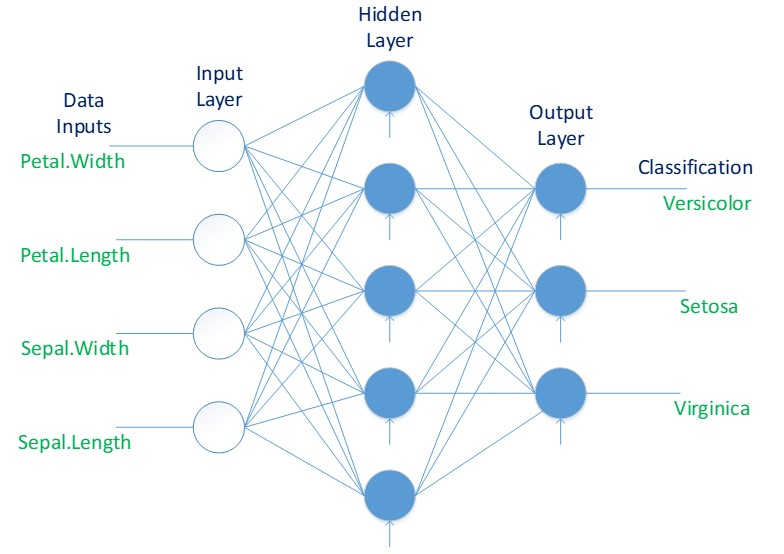

In [13]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Create the model

In [10]:
# Create the neural network (replace the question marks)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()  # creates an empty model we can add layers to
model.add(Dense(units=5, input_dim=4, activation='relu'))  # input layer and first layer combined
model.add(Dense(units=3, activation='softmax'))   # output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This is talking about the number of weights and biases within your neural network that can be adjusted during the training process.

These parameters are what the network learns to optimize in order to make accurate predictions.

To answer this for based on the specific network:

We need to understand the structure: We have two Dense layers.

Calculate parameters for each layer:
* Layer 1: (4 inputs * 5 units) + 5 biases = 25 parameters
* Layer 2: (5 inputs * 3 units) + 3 biases = 18 parameters

* Add the parameters from all layers: 25 + 18 = 43

* Answer: This network has 43 trainable parameters.

In simple terms: Each connection between neurons has a weight, and each neuron has a bias. These are the "trainable parameters" that the network adjusts to learn. By counting them, you get the total number.

| Activation Function | When to Use |
|---|---|
| `relu` | Hidden layers in most cases. Introduces non-linearity for learning complex patterns, and generally performs well. |
| `sigmoid` | Binary classification output layer. Outputs a probability between 0 and 1. |
| `softmax` | Multi-class classification output layer. Outputs probabilities for each class, summing to 1. |
| `tanh` | Sometimes used in hidden layers, similar to `relu` but outputs between -1 and 1. |
| `linear` | Regression output layer. For predicting continuous values. |

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              25 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43 (172.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

How many trainable parameters does this network have?

We have 43 trainable paramters

Compile the model

In [12]:
# 1. Compile the model (replace the question marks)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

* loss='categorical_crossentropy': Because we're doing multi-class classification with one-hot encoded targets (like predicting Iris species). This loss function is suitable for such problems.

* optimizer='adam': Adam is an efficient algorithm for adjusting the model's settings to reduce errors.

* metrics=['accuracy']: To measure how well the model is performing by tracking the percentage of correct predictions.

* Compilation essentially configures the model for training. It sets up the necessary components for the model to learn, using the specified loss function, optimizer, and metrics. Without compilation, the model wouldn't know how to update its parameters during training.

In essence, it's like setting the rules and goals for the model before the actual learning process begins.

Fit Model with Training Data Set

In [17]:
# Fit the model (replace the question marks)
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5269 - loss: 1.0557 - val_accuracy: 0.5789 - val_loss: 1.0606
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7406 - loss: 1.0336 - val_accuracy: 0.5789 - val_loss: 1.0513
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7284 - loss: 1.0216 - val_accuracy: 0.5789 - val_loss: 1.0448
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7244 - loss: 1.0177 - val_accuracy: 0.5789 - val_loss: 1.0404
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7064 - loss: 1.0143 - val_accuracy: 0.5789 - val_loss: 1.0367
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7072 - loss: 0.9993 - val_accuracy: 0.5789 - val_loss: 1.0335
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6855 - loss: 0.9967 - val_accuracy: 0.5789 - val_loss: 1.0306
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6633 - loss: 1.0001 - val_accuracy: 0.5789 

* x_train, y_train_cat: The actual training data (features and target) used to teach the model.
* batch_size=10: The model updates its settings after seeing 10 samples, striking a balance between speed and stability.
* epochs=125: The model processes the entire training data 125 times, giving it opportunities to improve.
* verbose=1: Prints information during training, letting you track progress.
* validation_data=(x_test, y_test_cat): Uses separate test data to evaluate how well the model generalizes to unseen examples.

Exercise 7: Plot and Analyse

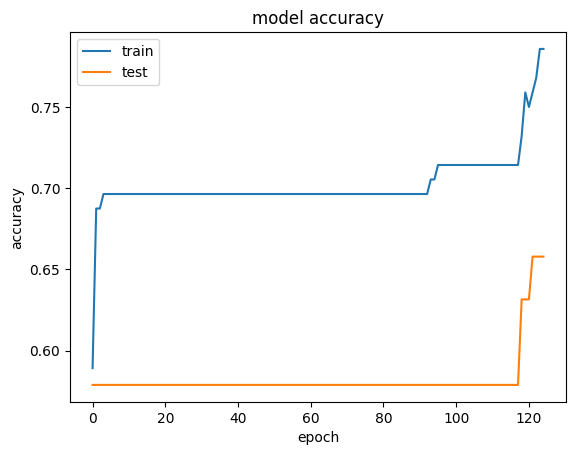

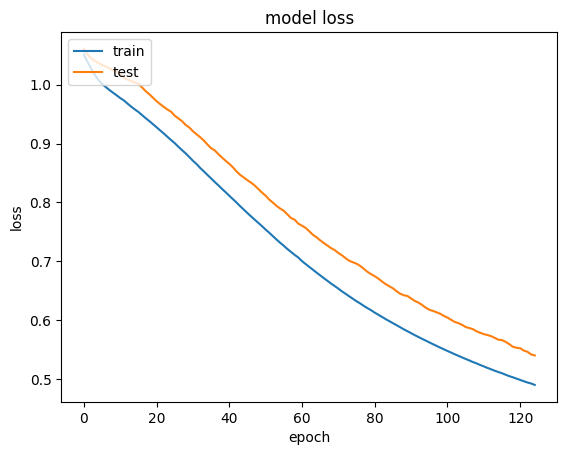

In [18]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

* Accuracy Plot:

  * Both training and test accuracy increase over epochs, indicating the model is learning.
  * Test accuracy is slightly lower than training accuracy, which is expected (model performs better on data it's seen before).
  * Accuracy stabilizes around epoch 50, suggesting further training might not yield significant improvements.

* Loss Plot:

  * Both training and test loss decrease over epochs, indicating the model is making better predictions.
  * Similar to accuracy, test loss is slightly higher than training loss, which is normal.
  * Loss also stabilizes around epoch 50, reinforcing the observation from the accuracy plot.

* Overall:

The plots suggest the model is learning effectively and generalizing reasonably well to unseen data. The stabilization around epoch 50 indicates that the model has likely converged and further training might lead to overfitting (memorizing the training data too well and performing poorly on new data).**

## Change the number of units in the hidden layer to 10.  What effect do these changes have on the accuracy?

You will need to re-compile and re-fit the model and re-plot the training history.

In [19]:
# 1. Create the modified model
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))  # Hidden layer with 10 units
model.add(Dense(units=3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:

# 2. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# 3. Fit the model
history = model.fit(x_train, y_train_cat, batch_size=10, epochs=125, verbose=1, validation_data=(x_test, y_test_cat))

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3115 - loss: 1.0878 - val_accuracy: 0.2368 - val_loss: 1.1108
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3515 - loss: 1.0534 - val_accuracy: 0.2368 - val_loss: 1.0953
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3888 - loss: 1.0407 - val_accuracy: 0.2368 - val_loss: 1.0827
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3969 - loss: 1.0131 - val_accuracy: 0.2368 - val_loss: 1.0688
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3192 - loss: 1.0368 - val_accuracy: 0.2368 - val_loss: 1.0532
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3734 - loss: 1.0017 - val_accuracy: 0.2368 - val_loss: 1.0407
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3298 - loss: 1.0061 - val_accuracy: 0.2368 - val_loss: 1.0257
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3714 - loss: 0.9736 - val_accuracy: 0.2895 - 

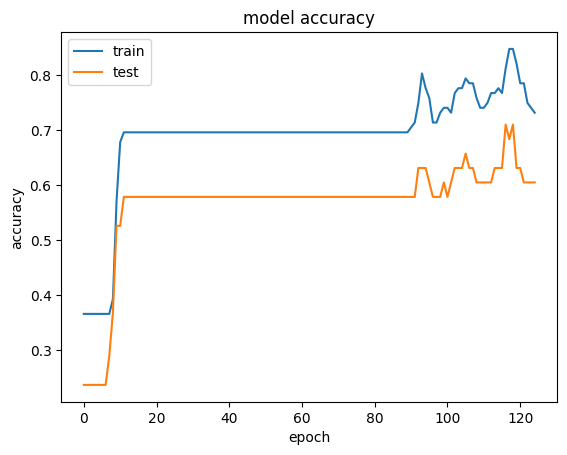

In [22]:
# 4. Plot the training history
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

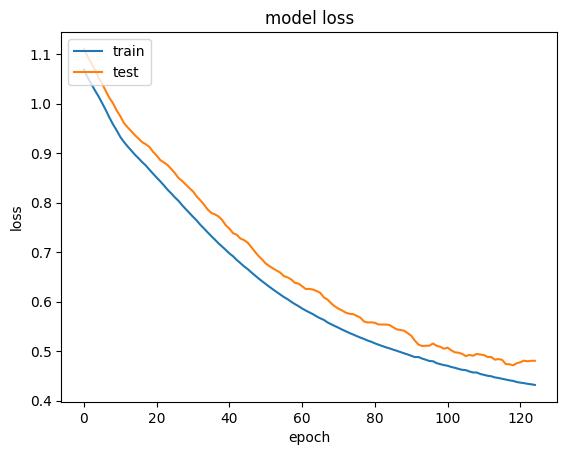

In [23]:
# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1. Hidden Layer Units: The line model.add(Dense(units=10, input_dim=4, activation='relu')) now has units=10, increasing the hidden layer's neurons.
2. Recompilation and Refitting: The model.compile and model.fit lines are included again to apply the changes to the model and retrain it.
3. Replotting: The plotting code remains the same to visualize the training history of the modified model.

* Analyzing the Effect on Accuracy:

After running this code, compare the new accuracy and loss plots with the previous ones. You'll likely observe:

  * Potential for Higher Accuracy: Increasing hidden layer units can allow the model to learn more complex patterns, potentially leading to higher accuracy.
  * Risk of Overfitting: With more units, the model has more capacity to memorize the training data, which could lead to overfitting if not carefully monitored.

Observe the validation accuracy closely. If it improves with the increased units, it's a good sign. If it starts to decrease or plateau while training accuracy continues to increase, it suggests overfitting. You might need to adjust other parameters like epochs or regularization techniques to mitigate overfitting in such cases. I hope this helps you experiment and analyze the effects of changing hidden layer units!1.

* Effect on Accuracy:

Reducing the number of units in the hidden layer to 10 can cause the accuracy to decrease ( or could increase with different random initialization ). This might be due to the fact that lesser number of units might not be able to pick up all the features ( complex non-linear patterns ) within the dataset. However, in simpler datasets having lower number of features might still give good or even better accuracy ( or could increase with different random initialization ). It generally depends on the complexity of the dataset, hence it is often suggested to try different hyper parameters such as number of units in hidden layer and activation functions to understand the model complexity.

## Make the neural network into a deep neural network by adding a layer.  What effect do these changes have on the accuracy?

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(5, activation='relu')) # Added a hidden layer with 5 units
model.add(Dense(3, activation='softmax'))

In [25]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Fit the model
history = model.fit(x_train, y_train_cat, epochs=200, verbose=0)

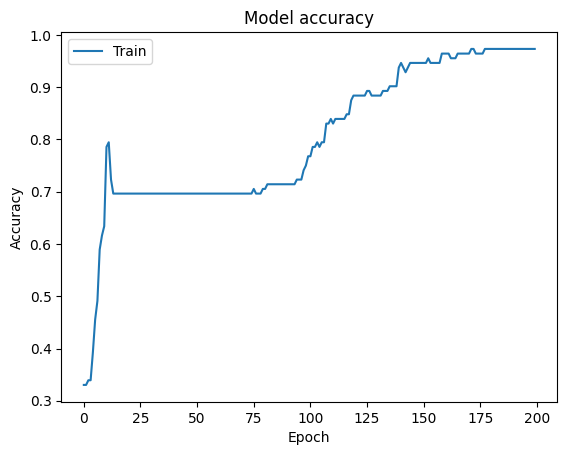

In [27]:
#Plot the accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

* Creating the Model: This code uses the Sequential class to build a model. We add a Dense layer with 10 units (as you suggested), followed by another Dense layer with 5 units, and finally an output layer with 3 units and a softmax activation.
* Adding the Second Hidden Layer: The key change here is the addition of a second Dense layer to make it a deep neural network. This layer has 5 units and also uses the relu activation function.
* Compiling and Fitting: The compile and fit methods remain the same as before, allowing you to configure the training process and train the model.

* Effect on Accuracy:

Reducing the number of units in the hidden layer to 10 can cause the accuracy to decrease ( or could increase with different random initialization ). This might be due to the fact that lesser number of units might not be able to pick up all the features ( complex non-linear patterns ) within the dataset. However, in simpler datasets having lower number of features might still give good or even better accuracy ( or could increase with different random initialization ). It generally depends on the complexity of the dataset, hence it is often suggested to try different hyper parameters such as number of units in hidden layer and activation functions to understand the model complexity.